<a href="https://colab.research.google.com/github/manjuiitm/MLP/blob/main/polynomial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import datetime as dt
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt

In [4]:
df = pd.read_csv("data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1460 non-null   int64
 1   1stFlrSF    1460 non-null   int64
 2   2ndFlrSF    1460 non-null   int64
 3   YearBuilt   1460 non-null   int64
 4   SalePrice   1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


In [9]:
# prompt: TypeError                                 Traceback (most recent call last)
# <ipython-input-7-7433e563cbe6> in <cell line: 0>()
# ----> 1 X = df.drop("SalePrice", 1)
#       2 y = df["SalePrice"]
# TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)

In [13]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)

PolynomialFeatures(degree=4)

In [14]:
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)
y_pred_poly = model_poly.predict(poly.fit_transform(X_test))

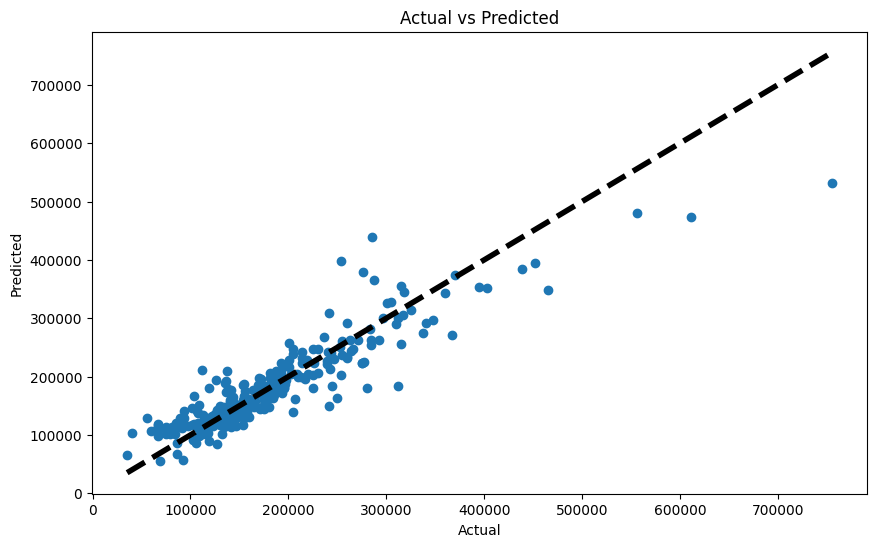

In [20]:
# prompt: write code to plot the data polynomial

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_poly, label='Polynomial Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual vs Predicted")
plt.show()


In [21]:
results = pd.DataFrame({
    "LinPred": y_pred_lin,
    "PolyPred": y_pred_poly,
    "TrueValues": y_test
})

In [19]:
rmse_lin = sqrt(mean_squared_error(results["TrueValues"], results["LinPred"]))
rmse_poly = sqrt(mean_squared_error(results["TrueValues"], results["PolyPred"]))

print("RMSE (Linear Regression): ", rmse_lin)
print("RMSE (Polynomial Regression): ", rmse_poly)

RMSE (Linear Regression):  46321.133955685
RMSE (Polynomial Regression):  36768.664778090315
